In [5]:
"""
This script pulls daily COVID-19 case data by state from the Covid Tracking API and exports it to a CSV file.
The data includes the number of new cases each day, starting from the beginning of the available dataset.

The Covid Tracking API provides access to COVID-19 testing and hospitalization data for the United States.
For more information, see https://covidtracking.com/data/api.
"""

import requests
import csv

url = "https://api.covidtracking.com/v1/states/daily.json"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    # Get a list of all the dates in the data
    dates = sorted(list(set([record["date"] for record in data])))

    # Create a dictionary to store the daily cases by state and date
    cases_by_state_and_date = {}

    # Loop through each date and state
    for date in dates:
        for record in data:
            if record["date"] == date:
                state = record["state"]
                cases = record["positiveIncrease"]
                
                # Add the daily cases to the state's total for this date
                if (state, date) in cases_by_state_and_date:
                    cases_by_state_and_date[(state, date)] += cases
                else:
                    cases_by_state_and_date[(state, date)] = cases

    # Write the results to a CSV file
    with open("daily_cases_by_state.csv", "w", newline="") as csvfile:
        fieldnames = ["date"] + sorted(list(set([record["state"] for record in data])))
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for date in dates:
            row = {"date": date}
            for state in sorted(list(set([record["state"] for record in data]))):
                row[state] = cases_by_state_and_date.get((state, date), 0)
            writer.writerow(row)
else:
    print("Error fetching data from API")


In [6]:
"""
This script pulls daily COVID-19 hospitalization data by state from the Covid Tracking API and exports it to a CSV file.
The data includes the number of new hospitalizations each day, starting from the beginning of the available dataset.

The Covid Tracking API provides access to COVID-19 testing and hospitalization data for the United States.
For more information, see https://covidtracking.com/data/api.
"""

import requests
import csv

url = "https://api.covidtracking.com/v1/states/daily.json"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    # Get a list of all the dates in the data
    dates = sorted(list(set([record["date"] for record in data])))

    # Create a dictionary to store the daily hospitalizations by state and date
    hospitalizations_by_state_and_date = {}

    # Loop through each date and state
    for date in dates:
        for record in data:
            if record["date"] == date:
                state = record["state"]
                hospitalizations = record["hospitalizedIncrease"]
                
                # Add the daily hospitalizations to the state's total for this date
                if (state, date) in hospitalizations_by_state_and_date:
                    hospitalizations_by_state_and_date[(state, date)] += hospitalizations
                else:
                    hospitalizations_by_state_and_date[(state, date)] = hospitalizations

    # Write the results to a CSV file
    with open("daily_hospitalizations_by_state.csv", "w", newline="") as csvfile:
        fieldnames = ["date"] + sorted(list(set([record["state"] for record in data])))
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for date in dates:
            row = {"date": date}
            for state in sorted(list(set([record["state"] for record in data]))):
                row[state] = hospitalizations_by_state_and_date.get((state, date), 0)
            writer.writerow(row)
else:
    print("Error fetching data from API")


In [7]:
"""
This script pulls daily COVID-19 deaths by state from the Covid Tracking API and exports it to a CSV file.
The data includes the number of new deaths each day, starting from the beginning of the available dataset.

The Covid Tracking API provides access to COVID-19 testing and hospitalization data for the United States.
For more information, see https://covidtracking.com/data/api.
"""

import requests
import csv

url = "https://api.covidtracking.com/v1/states/daily.json"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    # Get a list of all the dates in the data
    dates = sorted(list(set([record["date"] for record in data])))

    # Create a dictionary to store the daily deaths by state and date
    deaths_by_state_and_date = {}

    # Loop through each date and state
    for date in dates:
        for record in data:
            if record["date"] == date:
                state = record["state"]
                deaths = record["deathIncrease"]
                
                # Add the daily deaths to the state's total for this date
                if (state, date) in deaths_by_state_and_date:
                    deaths_by_state_and_date[(state, date)] += deaths
                else:
                    deaths_by_state_and_date[(state, date)] = deaths

    # Write the results to a CSV file
    with open("daily_deaths_by_state.csv", "w", newline="") as csvfile:
        fieldnames = ["date"] + sorted(list(set([record["state"] for record in data])))
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for date in dates:
            row = {"date": date}
            for state in sorted(list(set([record["state"] for record in data]))):
                row[state] = deaths_by_state_and_date.get((state, date), 0)
            writer.writerow(row)
else:
    print("Error fetching data from API")


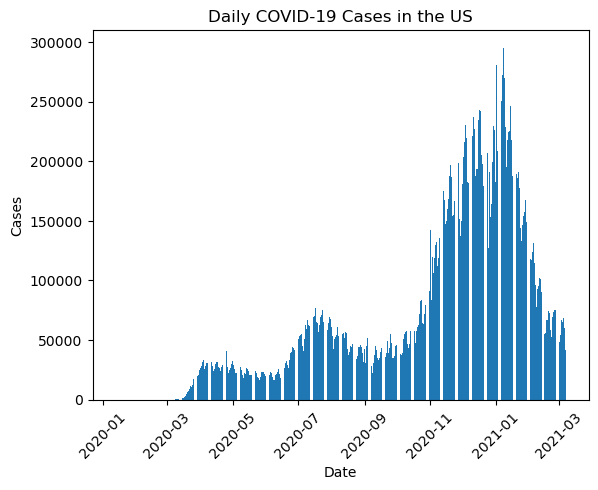

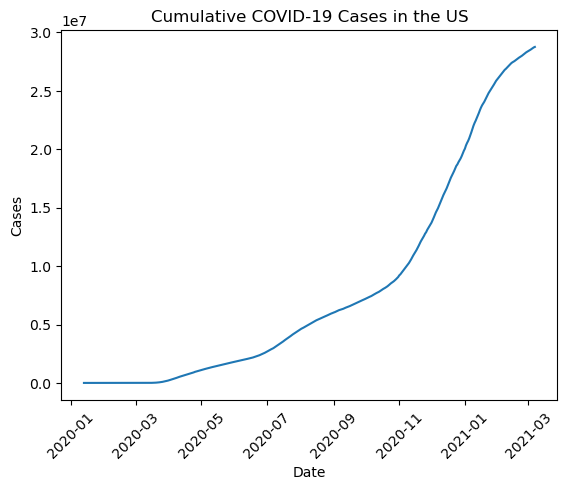

In [11]:
"""
This script pulls the daily COVID-19 cases in the US from the COVID Tracking API, exports the data to a CSV file,
and creates a bar chart of the daily cases and a line chart of the cumulative cases over time.
"""

import requests
import csv
import datetime
import matplotlib.pyplot as plt

url = "https://api.covidtracking.com/v1/us/daily.json"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    # Sort the data by date
    data_sorted = sorted(data, key=lambda x: x["date"])

    # Extract the dates and cases from the data
    dates = [datetime.datetime.strptime(str(record["date"]), '%Y%m%d') for record in data_sorted]
    cases = [record["positiveIncrease"] for record in data_sorted]

    # Write the results to a CSV file
    with open("daily_cases_us.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["date", "cases"])
        for i in range(len(dates)):
            writer.writerow([dates[i].strftime('%m/%d/%Y'), cases[i]])

    # Create a bar chart of the daily cases
    plt.bar(dates, cases)
    plt.title("Daily COVID-19 Cases in the US")
    plt.xlabel("Date")
    plt.ylabel("Cases")
    plt.xticks(rotation=45)
    plt.show()

    # Create a line chart of the cumulative cases
    plt.plot(dates, [sum(cases[:i+1]) for i in range(len(cases))])
    plt.title("Cumulative COVID-19 Cases in the US")
    plt.xlabel("Date")
    plt.ylabel("Cases")
    plt.xticks(rotation=45)
    plt.show()

else:
    print("Error fetching data from API")

